COMP9517 Project

Student Name: Xuetong Wang

Student Id: z5431400

尝试查看图片

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mmengine.config import Config

In [2]:
path_image = "D:/jue/comp_9517_project/61541v001/data/WildScenes/WildScenes2d/V-02/image/1623370408-092005506.png"

In [3]:
img = cv2.imread(path_image)

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

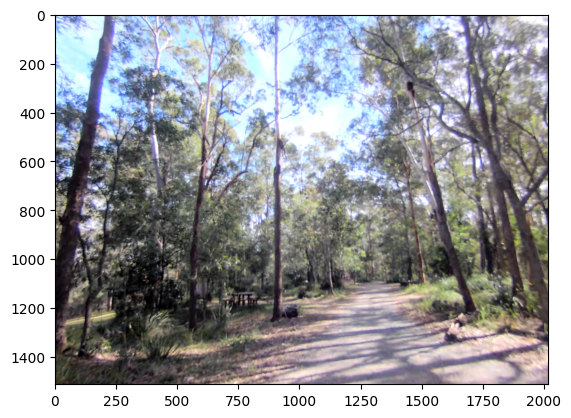

In [5]:
plt.imshow(img_rgb)

In [6]:
path_label = "D:/jue/comp_9517_project/61541v001/data/WildScenes/WildScenes2d/V-02/label/1623370408-092005506.png"

In [7]:
label = cv2.imread(path_label)

In [8]:
label_rgb = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)

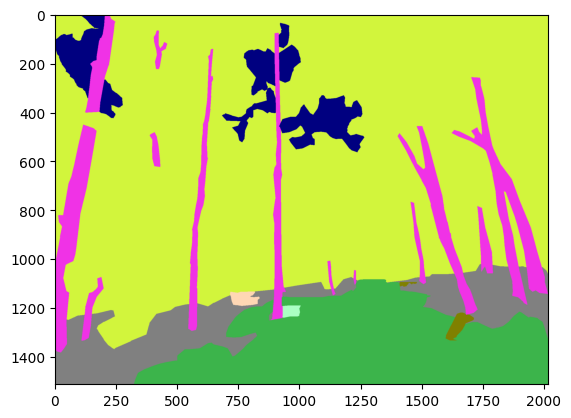

In [9]:
plt.imshow(label_rgb)

In [29]:
path_indexLabel = "D:/jue/comp_9517_project/61541v001/data/WildScenes/WildScenes2d/V-02/indexLabel/1623370408-092005506.png"

In [30]:
indexLabel = cv2.imread(path_indexLabel,0)

In [31]:
np.max(indexLabel)

18

In [32]:
np.min(indexLabel)

2

In [33]:
indexLabel_rgb = cv2.cvtColor(indexLabel, cv2.COLOR_BGR2RGB)

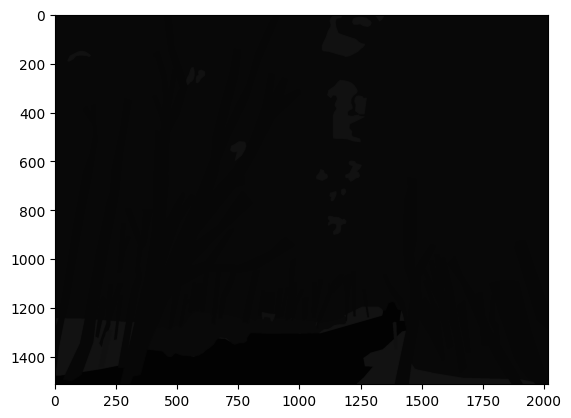

In [15]:
plt.imshow(indexLabel_rgb)

In [34]:
output = np.zeros_like(indexLabel)

In [48]:
indexLabel

array([[ 8,  8,  8, ...,  8,  8,  8],
       [ 8,  8,  8, ...,  8,  8,  8],
       [ 8,  8,  8, ...,  8,  8,  8],
       ...,
       [18, 18, 18, ...,  2,  2,  2],
       [18, 18, 18, ...,  2,  2,  2],
       [18, 18, 18, ...,  2,  2,  2]], dtype=uint8)

In [35]:
[row, col] = indexLabel.shape

In [46]:
for r in range(row):
  for c in range(col):
    if indexLabel[r,c] == 2:
      output[r,c] = 255

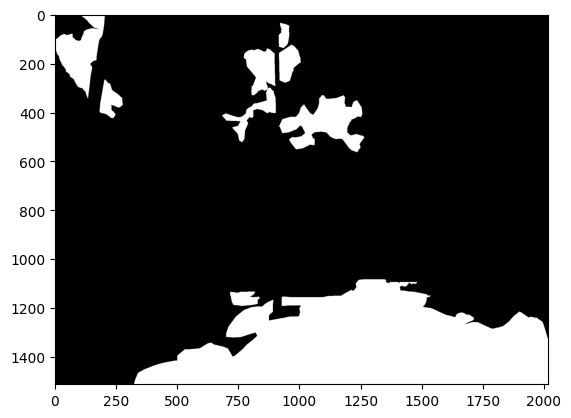

In [47]:
plt.imshow(output, 'gray')

In [20]:
from sklearn.metrics import jaccard_score
"""
  计算每个类的Jaccard相似系数(JSC)并返回所有类的均值。
  
  参数：
  y_true: 手动标注的图像（真值）
  y_pred: 分割后的图像
  num_classes: 图像中的类别数
  
  返回：
  mean_jsc: 所有类的JSC均值
  class_jsc: 每个类的JSC
"""
def calculate_jsc(y_true, y_pred, num_classes):
	class_jsc = []
	
	for cls in range(num_classes):
		true_class = (y_true == cls)
		pred_class = (y_pred == cls)
		jsc = jaccard_score(true_class.flatten(), pred_class.flatten(), average='binary')
		class_jsc.append(jsc)
	
	mean_jsc = np.mean(class_jsc)
	
	return mean_jsc, class_jsc